In [1]:
import numpy as np
import glob
import os
import cv2
import matplotlib.pyplot as plt
import math
from random import *

%matplotlib inline

['./card_templates/c8.jpg', './card_templates/c9.jpg', './card_templates/h13.jpg', './card_templates/s13.jpg', './card_templates/s6.jpg', './card_templates/dummy.jpg', './card_templates/s7.jpg', './card_templates/s12.jpg', './card_templates/h12.jpg', './card_templates/h10.jpg', './card_templates/s10.jpg', './card_templates/s5.jpg', './card_templates/s4.jpg', './card_templates/s11.jpg', './card_templates/h11.jpg', './card_templates/d9.jpg', './card_templates/s1.jpg', './card_templates/d8.jpg', './card_templates/h9.jpg', './card_templates/s3.jpg', './card_templates/s2.jpg', './card_templates/h8.jpg', './card_templates/d6.jpg', './card_templates/joker.jpg', './card_templates/h5.jpg', './card_templates/h4.jpg', './card_templates/d7.jpg', './card_templates/d5.jpg', './card_templates/h6.jpg', './card_templates/h7.jpg', './card_templates/d4.jpg', './card_templates/h3.jpg', './card_templates/d11.jpg', './card_templates/s9.jpg', './card_templates/s8.jpg', './card_templates/d10.jpg', './card_tem

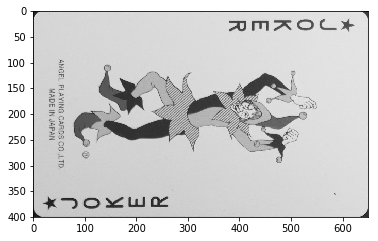

In [2]:
image_data_path = "./card_templates/"
_image_files = os.listdir(image_data_path)
image_file_names = list(map(lambda image_file_name : image_data_path + image_file_name , _image_files))
print(image_file_names)

image_files = []

for n in image_file_names:
        image_files.append(cv2.imread( n,1))

plt.imshow(image_files[5])
plt.show()

In [7]:
# Generates 512*512 data with answers
from random import *
def generate_dateset(image_files):
    
    def set_cards_to_canvas(num_cards = 1):
        pass
    
    class delta_list:
        def __init__(self, delta_range = 50):
            self.left_top = [randint(-delta_range,delta_range),randint(-delta_range,delta_range)]
            self.right_top = [randint(-delta_range,delta_range),randint(-delta_range,delta_range)]
            self.right_bottom = [randint(-delta_range,delta_range),randint(-delta_range,delta_range)]
            self.right_bottom = [randint(-delta_range,delta_range),randint(-delta_range,delta_range)]

    
    delta = delta_list()
    
    generated_image_and_ans = [3]
    return generated_image_and_ans

In [8]:
test = generate_dateset(image_files)

In [34]:
class DataGenerator():
    def __init__(self, batch_size, image_size, image_list, image_classid_list, max_num = 1):
        self.batch_size = batch_size
        self.image_size = image_size
        
        self.image_list = image_list
        self.image_classid_list = image_classid_list
        
        self.max_num = max_num
        
    def generate_image(self):
        idx = randint(0, len(self.image_list))
        
        src_image = image_files[idx]
        
        class_id = idx
        
        # decide center
        bx = np.random.random()
        by = np.random.random()
       
        center = [(int) (bx*self.image_size[0]),(int) (by*self.image_size[1])]
        
        # decide scale
        scale = 0.4
        bw = src_image.shape[1]*scale/self.image_size[0]
        bh = src_image.shape[0]*scale/self.image_size[1]

        resized_image = cv2.resize(src_image, ((int)(scale * src_image.shape[1]),(int)(scale * src_image.shape[0])))
        
        canvas = np.zeros((self.image_size[0], self.image_size[1]), dtype = np.uint8)

        T = np.array([[1.0, 0.0, 1.0*(int)(bx*canvas.shape[0]) - resized_image.shape[1]/2], 
                                [0.0, 1.0, 1.0*(int)(by*canvas.shape[1]) - resized_image.shape[0]/2],
                                [0.0, 0.0, 1.0]])
        canvas = cv2.warpPerspective(resized_image, T, (canvas.shape[0],canvas.shape[1]))
        
        print(canvas.shape)
        
        plt.imshow(canvas)
        plt.show()
        
        return canvas, class_id, bx, by, bw, bh

    def generate(self):
        while True:
            X = np.zeros((self.batch_size, 1, self.image_size, self.image_size))
            Y =  np.zeros((self.batch_size, 5))
            for i in range(self.batch_size):
                img, cls, bx, by, bw, bh = self.generate_image()
                X[i] = img
                Y[i] = np.c_(cls, bx, by, bw, bh)  # np.r_かも
            yield X, Y
            
    def generate_test(self):
            X = np.zeros((self.batch_size, self.image_size[0], self.image_size[1], 3))
            Y = np.zeros((self.batch_size, 5))
            for i in range(self.batch_size):
                img, cls, bx, by, bw, bh = self.generate_image()
                X[i] = img
                Y[i] = np.r_[cls, bx, by, bw, bh]  
                print("X=", X[i])
                print("X=", Y[i])
            
            return True;

(512, 512, 3)


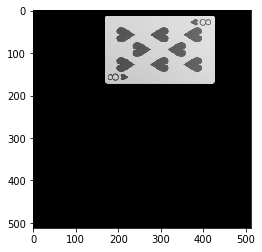

X= [[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 ..., 
 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]
X= [ 21.           0.582984     0.18300451   0.5078125    0.3125    ]


True

In [71]:
generator = DataGenerator(1, [512, 512], image_files, image_file_names, 1)
generator.generate_test()